This is the section 14 of Bogdan's course.

Now we are back at network layer of TCP/IP model; and we'll describe 

- what router is and what the purpose of router is?
- What is routing protocol and how routers route packets. 
- We will learn CIDR (Classless Interdomain Routing)
- What is routes summarization & aggration
- What are IGP & EIGRP Protocols
- How do packets travel from one network to another?



## What are the responsibilities of a router?

In the previous sections, we compared switches & routers;

- Switches work at Data Link Layer; they relay frames between source and destination
- Routers work in Network Layer; forward IP packets from source to destination


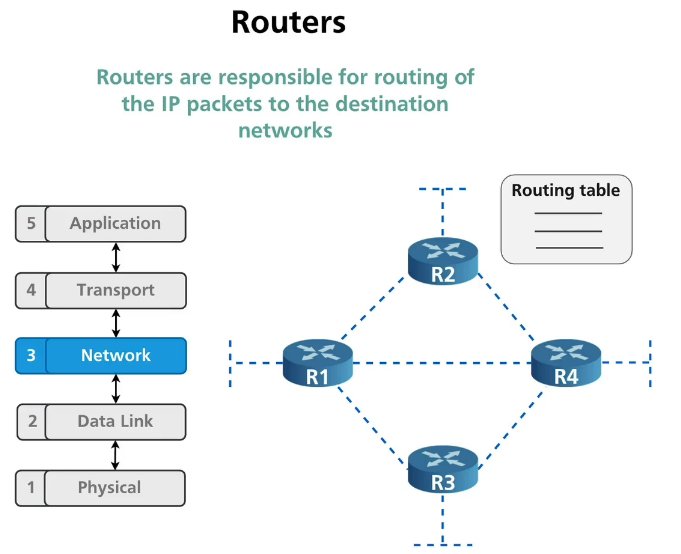

Note that IP (network) protocol is connectionless protocol; every IP packet
is treated seperately by the routers. This means multiple IP packets may travel
in different routes within internet. And routers decide which route an IP packet
will take. Routers operate on network layer and they have routing tables; inside routing tables routers find path(s) to destination networks.

In the sample diagram, there are local networks allocated behind every router.
Those routers must exchange information about those local networks that are behind them
in order to be able to route packets from one local network to another.
For example, R1 needs to inform about its own local network to R2, R4 and R3.
That could be done using dynamic network protocols (automatically) or statically (manually). If R1 informs its local network statically to other routers, then
those routes are called "static routes". 

Note that every router will have its own routing table, which is utilized when
making a routing decesion. If there is no matching route, then the packet will be silently dropped.

The responsibility of every router;

- Build routing table
- Route IP packets





## Routing Table (Lecture 127 of Bogdan)

Routers can process millions of packets / sec. Every router not only examines
the packets but also performs operations with IP header. For example; 
 - verifying IP header checksum
 - decrementing TTL and re-calculating the IP header checksum
 - routes IP packets based on router's own IP table
 

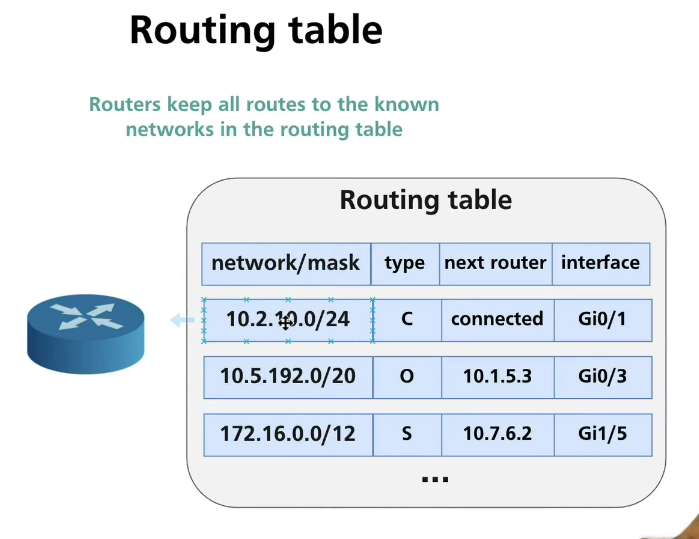

Above is an example routing table; which shows which routes the router has discovered up until now.

Type can be (C)onnected, (O)SPF, (S)tatic. A single routing table may have multiple routes with different types.

OSPF is dynamic routing protocol. A Static route is added manually to the routing table.

To understand type of routes/routing table entries, refer to
[1] https://study-ccna.com/connected-static-dynamic-routes/

For clarity, i call a routing table entry as route. I think you also used the term 'route' in Lecture 127 as so.


**How to choose which route to forward the packet to?**

WAY 1 : Based on the first matching route

Lecture 127 @4:09, you say that the order of routes in the routing table matters; The router will pick the first route in the routing table, where there is a match between the packet's destination network's sub-net address and the sub-net address of the route in the routing table. Using the routing table in Lecture 127 as an example;

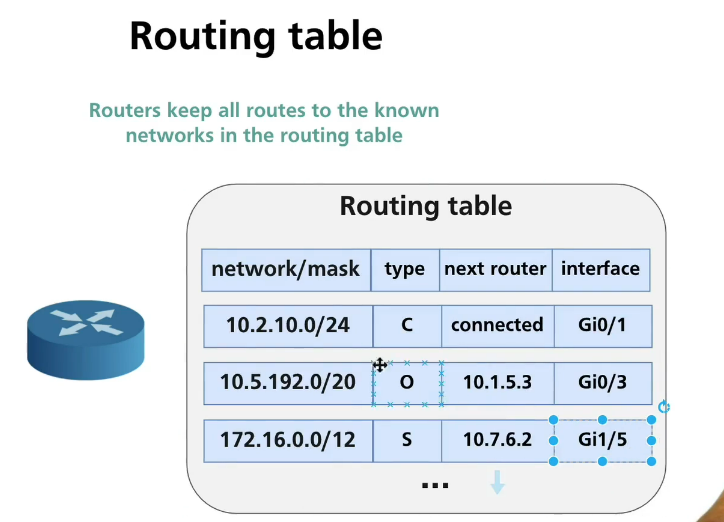

Imagine a packet with destination IP address 10.2.10.7 arrives to the router, which checks with the first entry/route in the table:


10.2.10.7           -> destination IP address of the packet

255.255.255.0   -> /24

----------------------------------------------

10.2.10.0          -> the packet's destination network's sub-net address

which matches with the routes sub-net address. Since a matching route is found, the router does not repeat the above process with the subsequent entries in the routing table, even though there may be other matches. So, it forwards the packet to Gi0/1 interface.


In Way 1, the order of routes in the routing table is important, as the first matching route will be used. This also implies that another route with a parent sub-net say 10.2.0.0/20 may shadow the route with sub-net address 10.2.10.0/24, if it is placed as the first entry in the routing table, as indicated below;


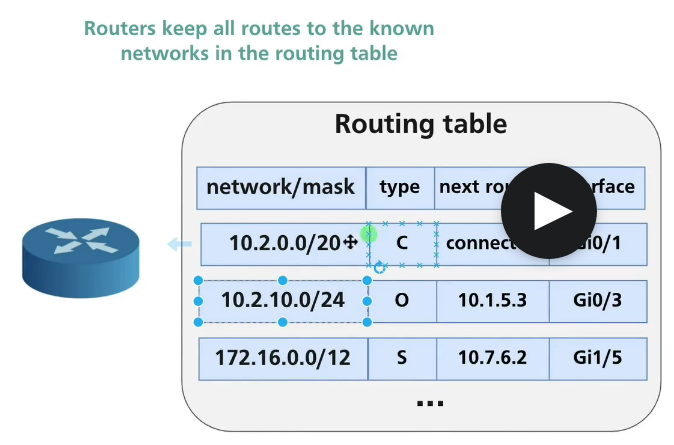

Q1) Is this understanding correct so far?


WAY #2 : Checking for all the matching routes and picking up the route with the longest sub-net mask

Q2) This way is explained here:
https://www.geeksforgeeks.org/routing-tables-in-computer-network/    
    
Comparing to way #1, which one is actually used by routers?

P.S Actual Udemy Question to Bogdan: https://www.udemy.com/course/world-of-computer-networking/learn/lecture/23374400#questions/16524246




## Overview : End to End IP Packet Transmission (L129 of Bogdan)

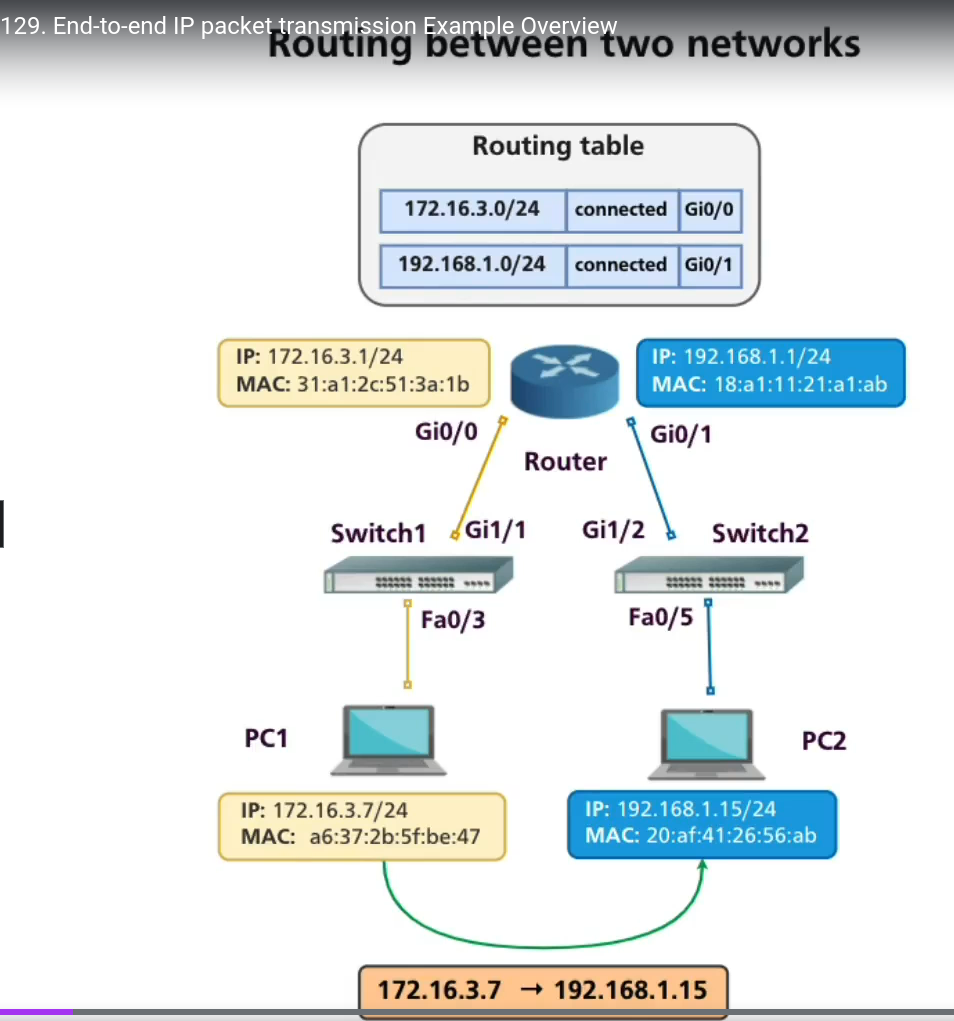

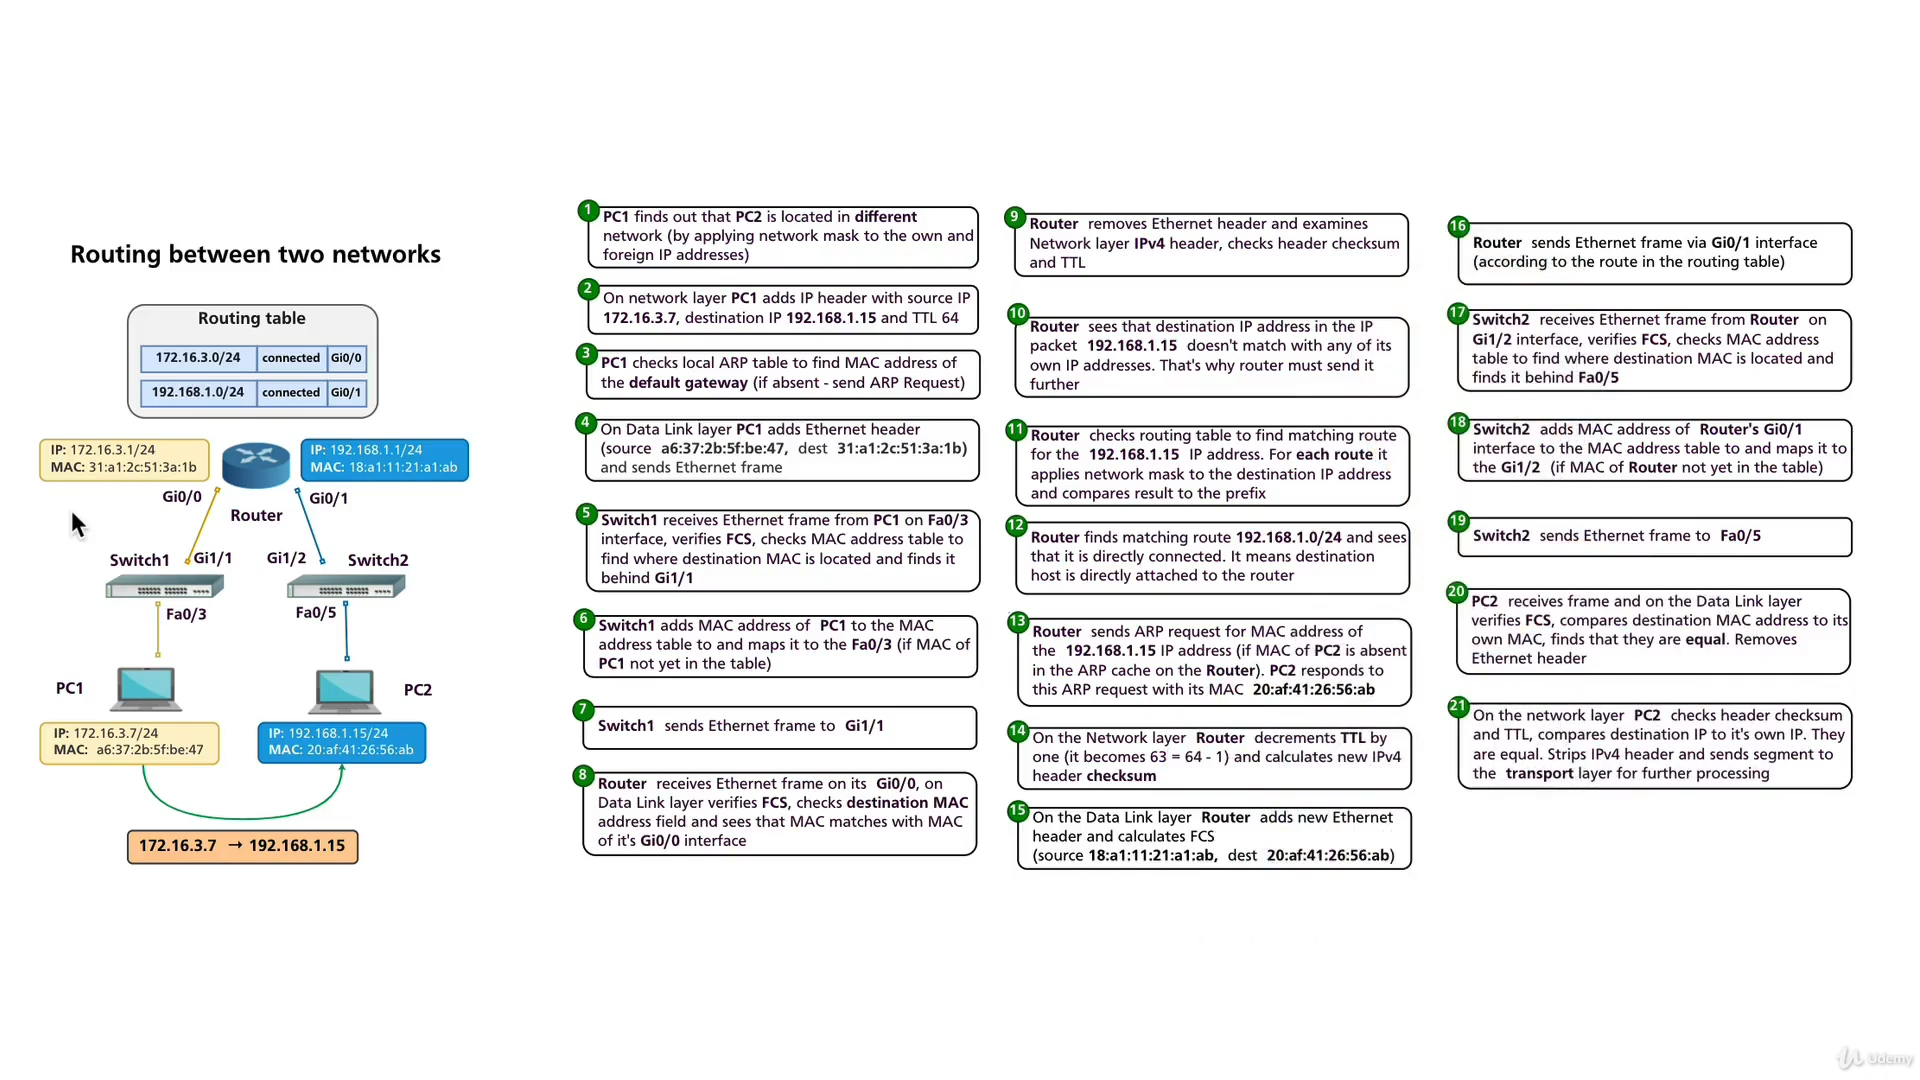

## Lecture 134 : Multiple Router's

In every LAN/WAN, there are more than one routers.

Let's have a look at the example below:

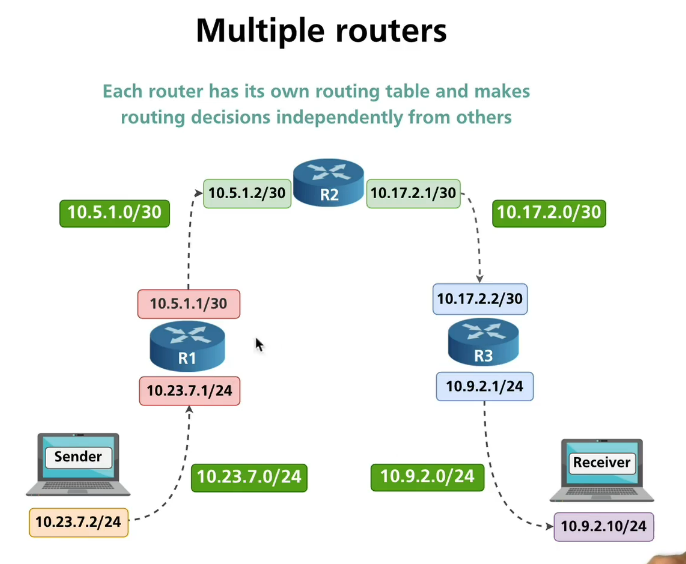

## Static vs Dynamic Routes ( Lecture 135 of Bogdan)

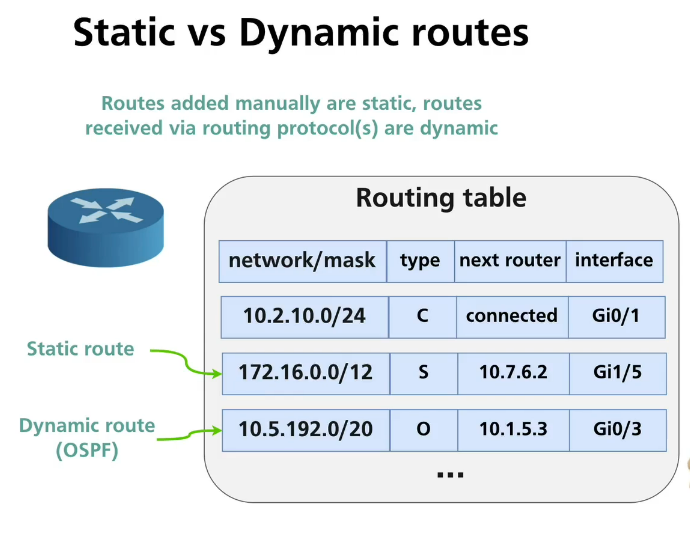

Routers amond themselves need to exchange information about the directly connected routes.
After the exchange, the routing tables will contain the necessary routes. Then packets
can be forwarded from one router to the other via the routing tables.

You could use either STATIC or DYNAMIC routes. STATIC ROUTE is a route that is added
to the routing table manually via WebUI or via a command line interface.
Or routes can be added to the routing tables dynamically via Dynamic Routing Protocol (e.g. OSPF)
In dynamic routing case, routers will perform an automatic exchange of the routes.

In the above example, we have a directly connected route, which is on interface Gi0/1 leading
to a directly connected network 10.2.10.0. 

The static route in the above example has been manually added by the admin. 

In an average routing table, there can be directly connected, static, or dynamic routes.



## Default Route (Lecture 136 of Bogdan)

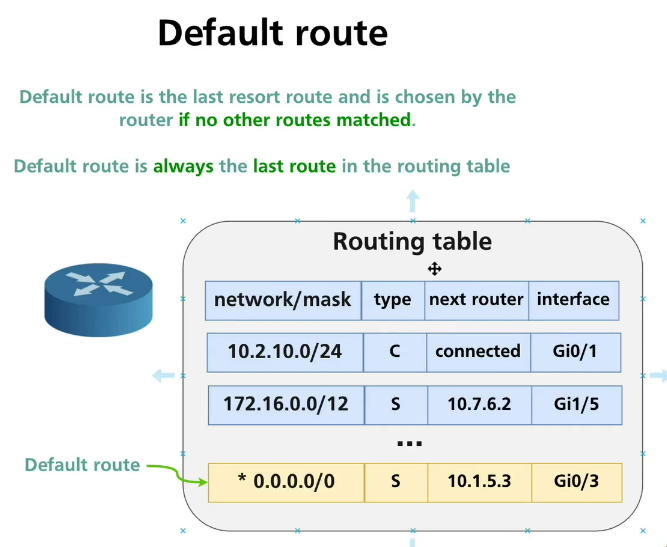

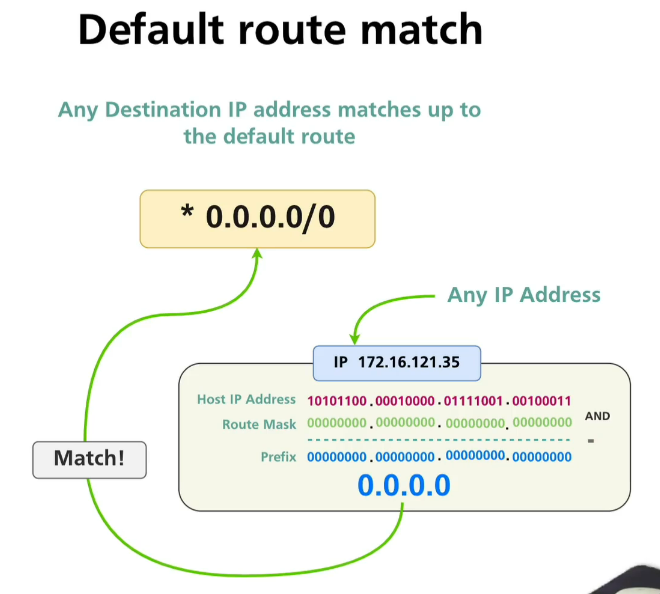

Default route has a next router to forward the packets to if no other matching routes found. 

Note that default route must be the last route in the table, if it is somewhere else (e.g. at the top)
then all the packets will be forwarded to the default route.

## Default Routes Usage (Lecture 138 of Bogdan)

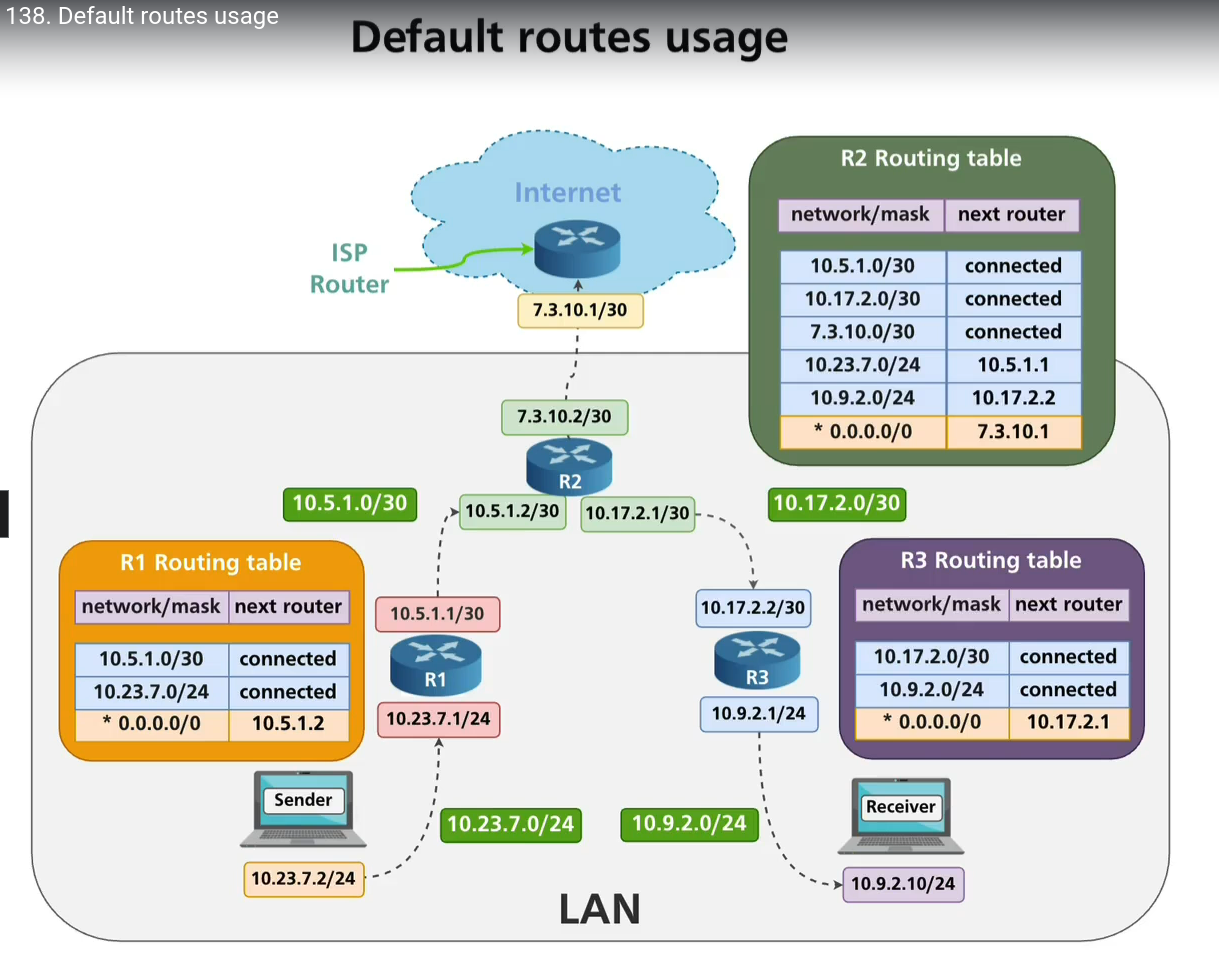

## How routers make routing decisions ( Lecture 139 of Bogdan )

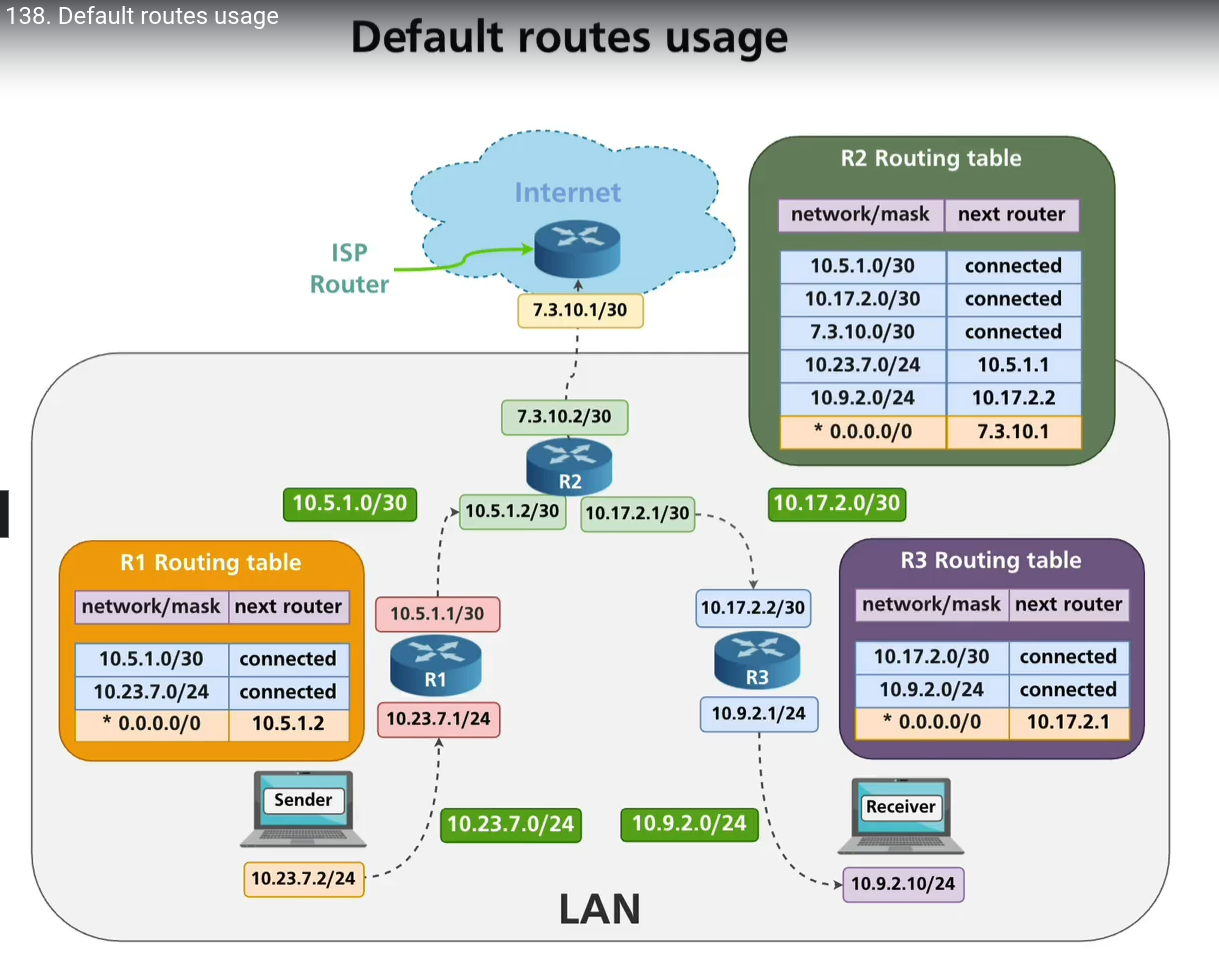

Lets use several sample IP addresses to explore how routers make their routing decesions:

## Dynamic Routing Protocols (Lecture 140 of Bogdan)

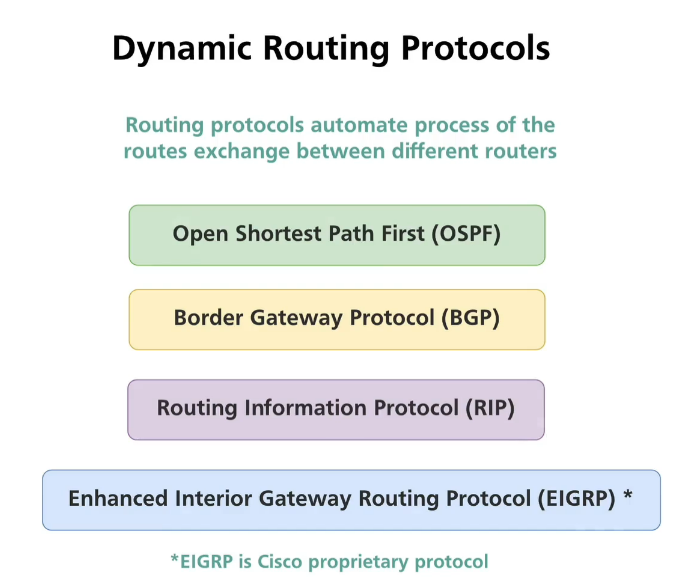

There are several dynamic routing protocols used to exchange directly connected routes
among routers. By doing the information exchange, routers for their routing tables.

The approach is to configure your new router out of the box; set the routing protocol such
as OSP, PGP, RIP or EIGRP then you could forget about the setting up of the routing table manually.

## Classless Interdomain Routing (CIDR) (Lecture 141 of Bogdan)

A detailed explanation on CIDR in [2] https://www.youtube.com/watch?v=86RDE_bP1Bs

Before commencing, refer to Class Based IP addresses & their first octet:

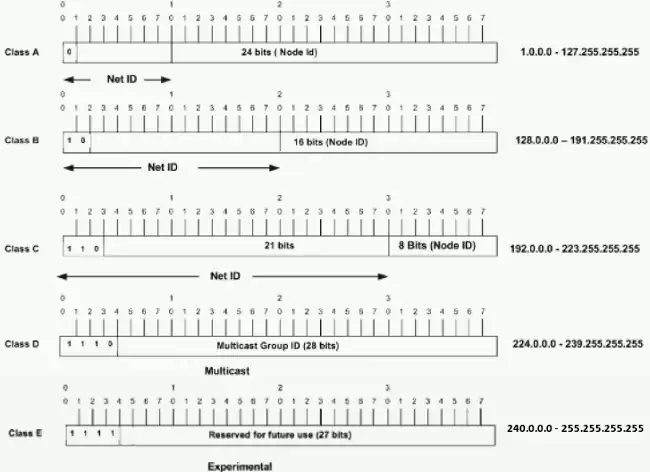

Figure 1 - IPv4 address classes

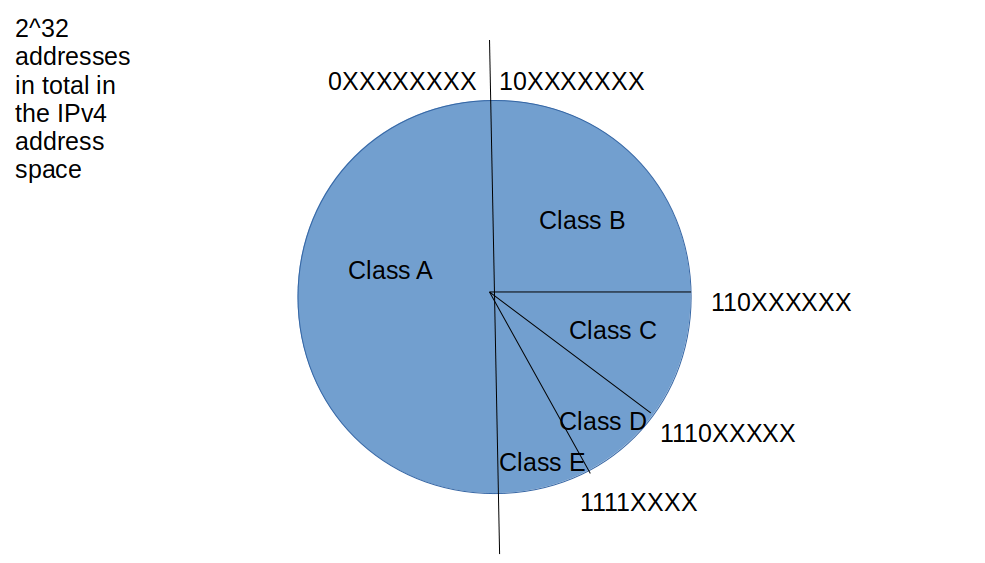

Figure 2 - Class based division of IPv4 address space

## ClassLESS Inter-Domain Routing (CIDR)

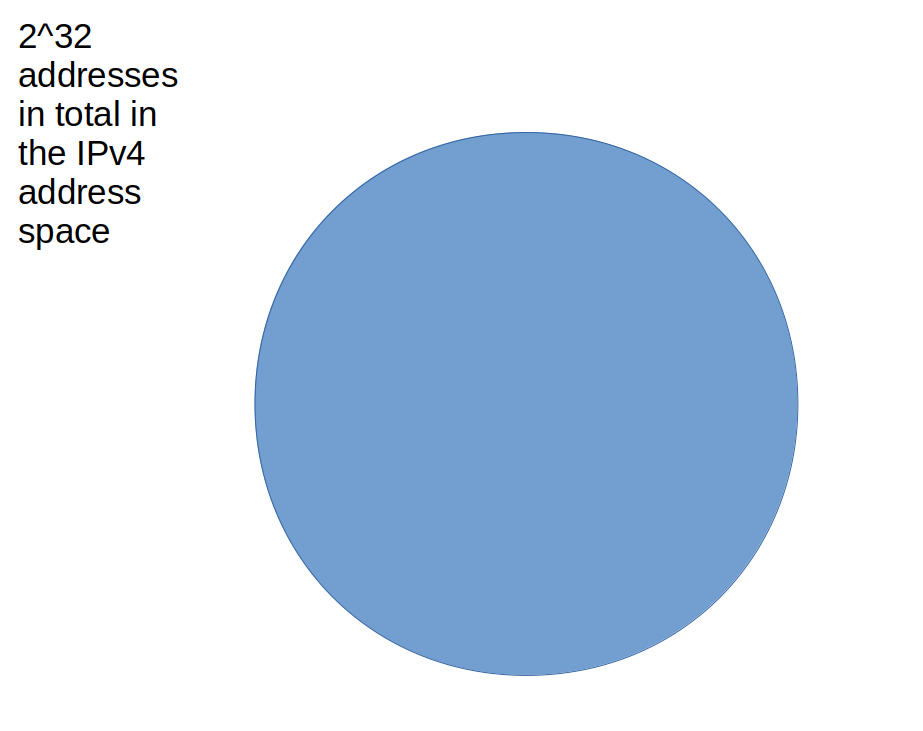

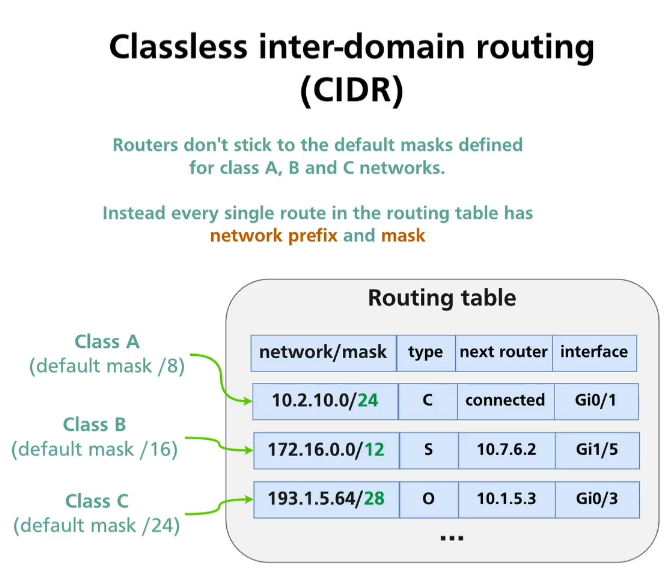

Referring to the second route in the routing table:
    
network/mask        type     next router     interface
172.16.0.0/12       S        10.7.6.2        Gi1/5

Note that 172.y.z.w address falls into class B addresses which has default mask /16.
However, in the route the mask is /12! This means that in routing tables, you can find
netmasks that are greater than the default masks (i.e. subnets of classes A, B, C).
As in this case, the mask /12 is shorter than the default length of the class (i.e. class B, /16).
That means that many class B networks have beeen aggregated or summarized!


**Important Take On Routers** Routers dont care about the default subnet mask of their routes. 
They care about the subnet mask of their routes (i.e. /n in x-y.z.w /n )

## Dynamic Routing Protocols : Route Summarization (Lecture 142 of Bogdan)

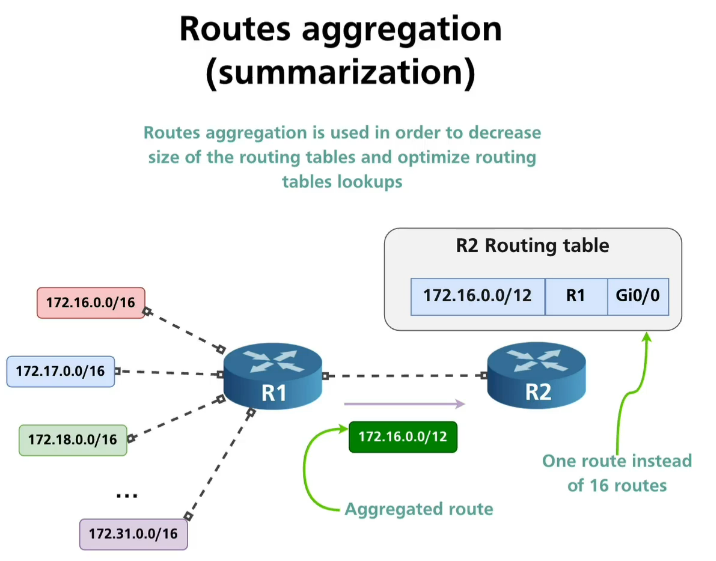

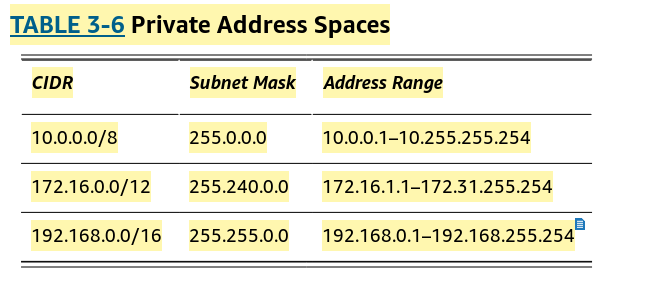

## Aggregation / Summarization of Private Address Spaces (Lecture 143 of Bogdan)

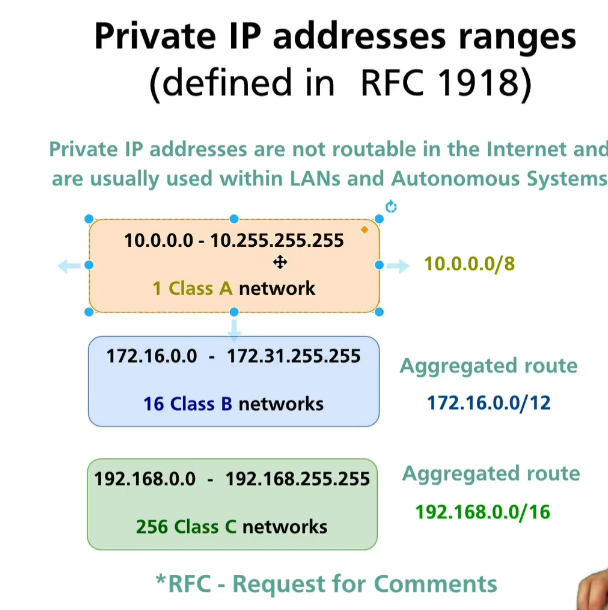

## Autonomous System (Lecture 144 of Bogdan)

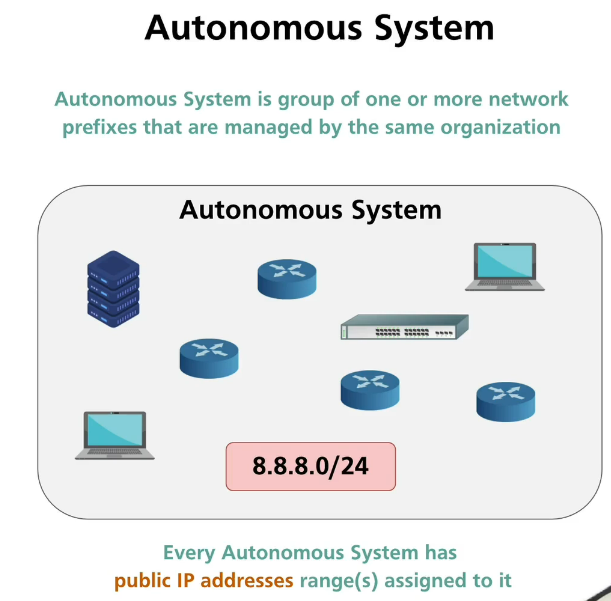

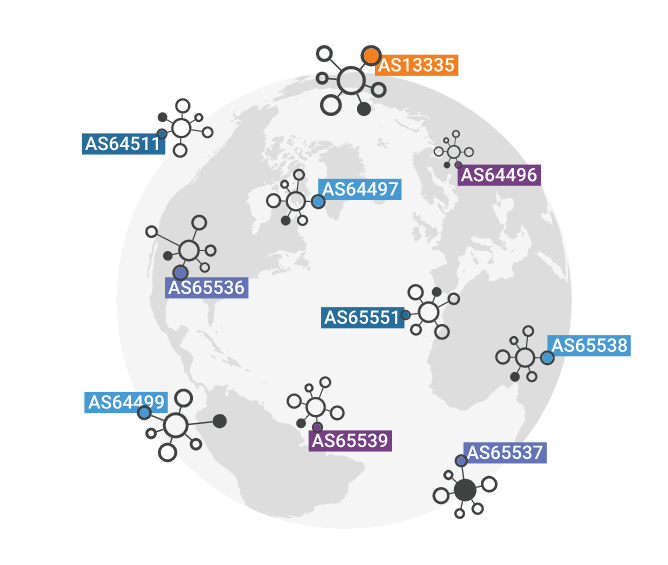

Imagine an AS as being like a town's post office. Mail goes from post office to post office until it reaches the right town, and that town's post office will then deliver the mail within that town. Similarly, data packets cross the Internet by hopping from AS to AS until they reach the AS that contains their destination Internet Protocol (IP) address. Routers within that AS send the packet to the IP address.

Every AS controls a specific set of IP addresses, just as every town's post office is responsible for delivering mail to all the addresses within that town. The range of IP addresses that a given AS has control over is called their "IP address space."

Most ASes connect to several other ASes. If an AS connects to only one other AS and shares the same routing policy, it may instead be considered a subnetwork of the first AS.

Typically, each AS is operated by a single large organization, such as an Internet service provider (ISP), a large enterprise technology company, a university, or a government agency.

*A network is a group of two or more connected hosts.

What is an AS routing policy?

An AS routing policy is a list of the IP address blocks that the AS controls, plus a list of the other ASes to which it connects. This information is necessary for routing packets to the correct networks. ASes announce their own AS routing policy to the Internet using the Border Gateway Protocol (BGP).

What is IP address space?

A specified group or range of IP addresses is called "IP address space." Each AS controls a certain amount of IP address space. (A group of IP addresses can also be called an IP address "block".)

Imagine if all the phone numbers in the world were listed in order, and each telephone company was assigned a range: Phone Co. A controlled numbers 000-0000 through 599-9999, and Phone Co. B controlled numbers 600-0000 through 999-9999. If Alice calls Michelle at 555-2424, her call will be routed to Michelle via Phone Co. A. If she calls Jenny at 867-5309, her call will be routed to Jenny by Phone Co. B.

This is sort of how IP address space works. Suppose Acme Co. operates an AS and controls an IP address range that includes the address 192.0.2.253. If a computer sends a packet to 192.0.2.253, the packet will eventually reach the AS controlled by Acme Co. If that first computer is also sending packets to 198.51.100.255, the packets go to a different AS (although they may pass through Acme Co.'s AS on the way).

Why is BGP routing necessary? Isn't IP used for routing?

IP, or the Internet Protocol, is indeed used for routing in that it specifies which destination each packet is going to. BGP is responsible for directing packets on the fastest route to their destination. Without BGP, IP packets would bounce around the Internet randomly from AS to AS, like a driver trying to reach their destination by guessing which roads to take.

Imagine Google is owning 8.8.8.0/24 PUBLIC IP address block, which we assigned to different subnets
and connect those subnets with internal routers.

Different autonomous systems form internet. 

When you connect via an ISP to internet, you are assigned an IP under ISP's autonomous system.

What is the difference between a LAN and an Autonomous System?

When you have a router & your laptop, you form a LAN, whose IP address is assigned from
the Autonomous System of your ISP.

## Autonomous System Number (ASN) (Lecture 145 of Bogdan)

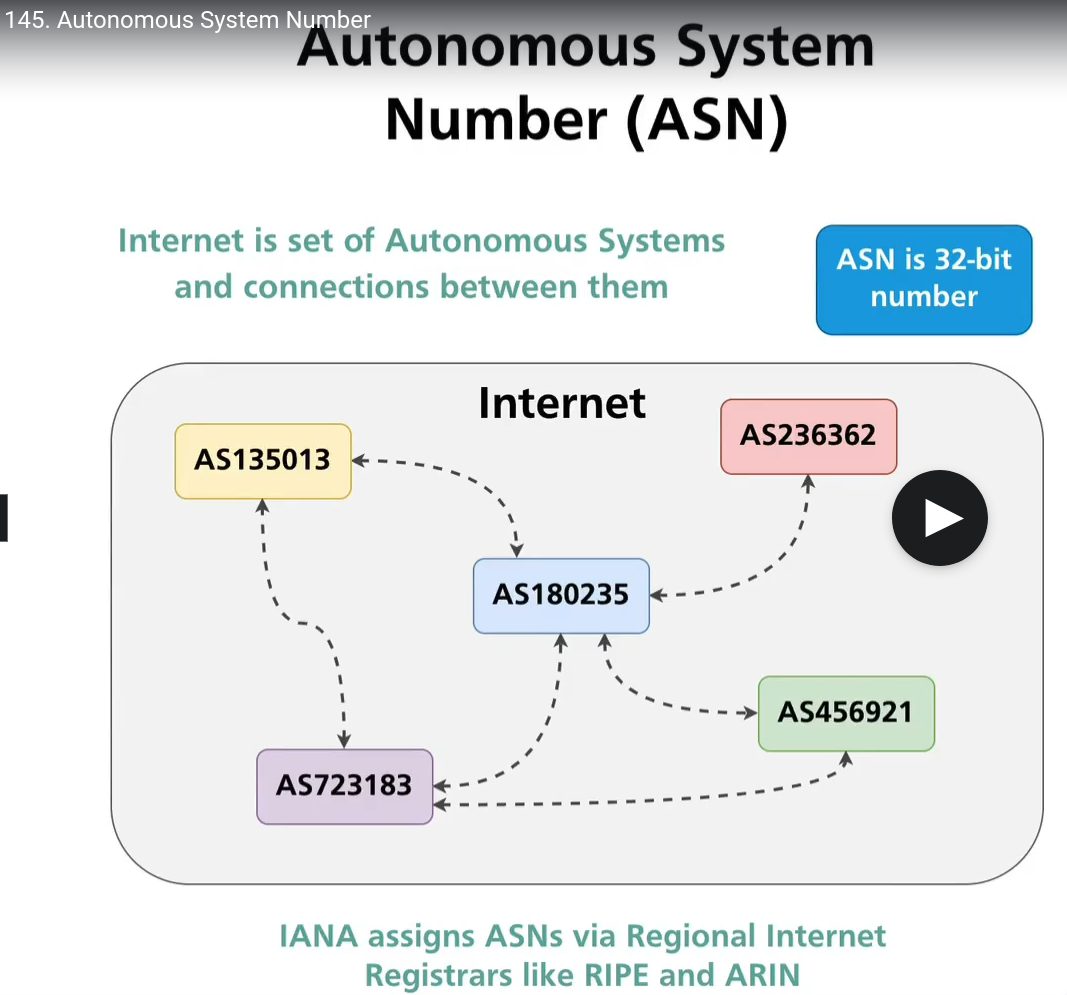

## Interior Gateway Protocol (IGP) vs Exterior Gateway Protocol (EGP) (Lecture 147 of Bogdan)

Now you know that internet is a set of ASes. There are different routing protocols
that work inside ASes and work outside of ASes.

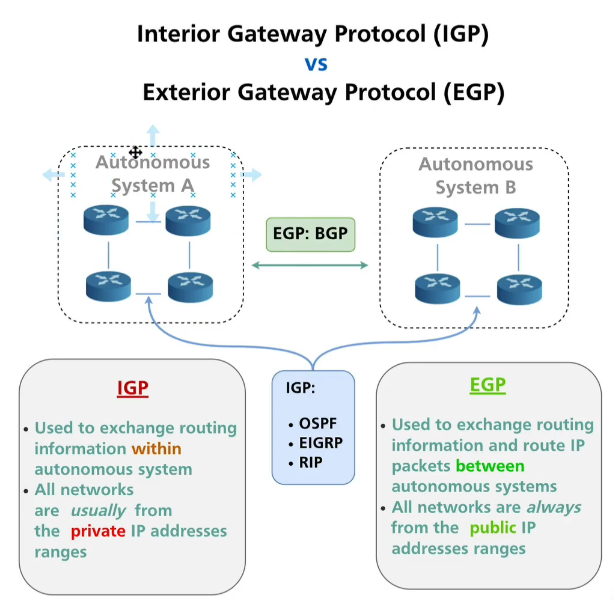

## Distance Vector & Link State Routing Protocols

In the previous lecture, we discussed the difference between IGP & EGP protocols.
This difference tells where the protocol operate; either within AS or in between ASes.

Now, lets answer the question how the routing protocol operates:

There are 2 types of routing protocol:

  - Link state routing protocols
  - Distance vector routing protocols


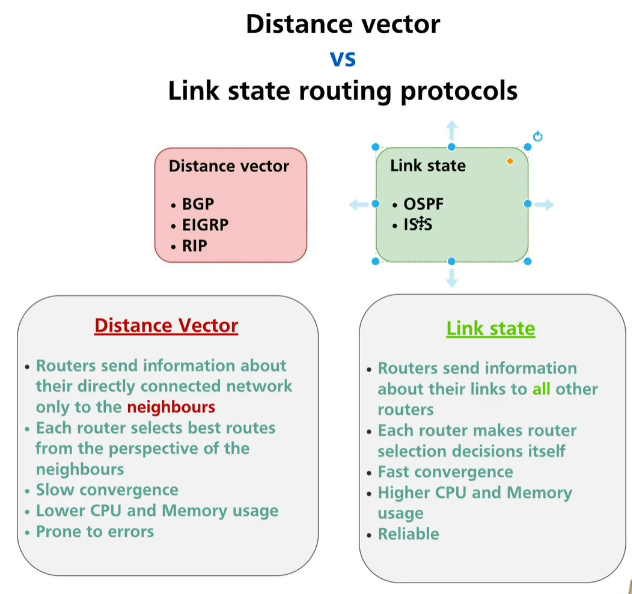

## Filtered Routes Containing Private IP Addresses in BGP (Lecture 149 of Bogdan)

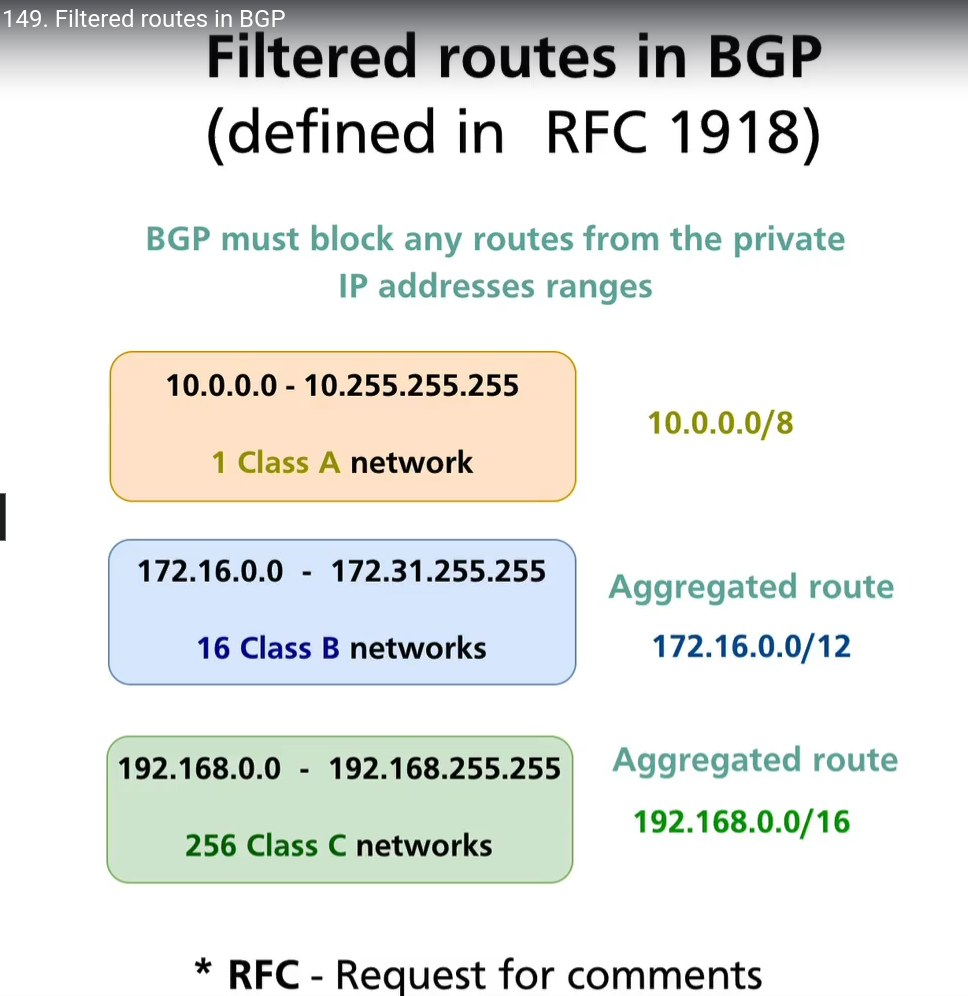

If a specific BGP Enabled Router A receives any of such networks or their subnets from its another BGP Enabled neighbour, it must filter out those routes and do not insert them into its BGP routing table. Neither the BGP Router A would NOT forward the private routes to other BGP routers. For that there is a specific mechanism called "BGP Prefix Lists", which we will investigate next;

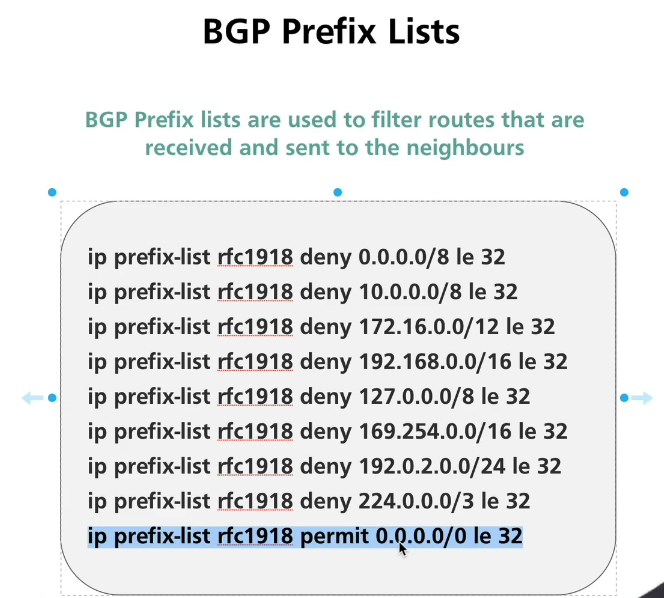

## Multiple Route Paths (Lecture 151 of Bogdan)

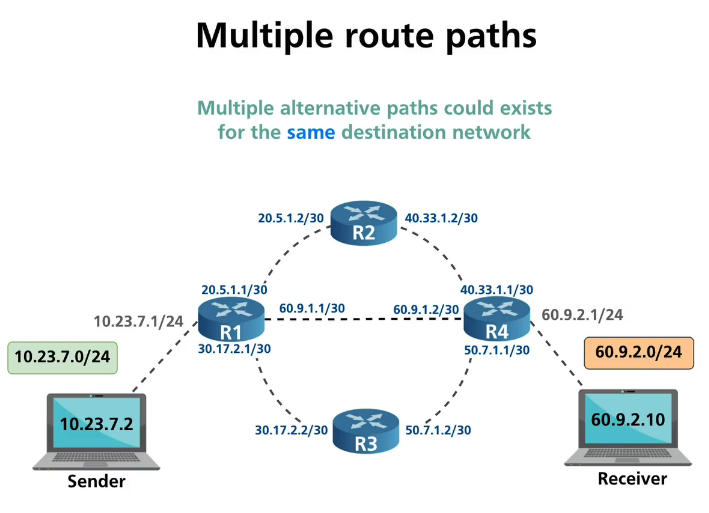

When R1 needs to choose route the remote network 60.9.2.0/24, it needs to choose via R2 or R3 or R4.
Different routing protocols operating in the router will choose different routes depending on their metric for the routes.

In Lecture 151 @ 1:36, you mention that

When router receives a specific network from any of its neighbors, it first inserts that into the ROUTING DATABASE, afterwards from the routing database, every router selects the best route and inserts it to the routing table.

## Routing Protocol Metric / Cost (Lecture 152 of Bogdan)

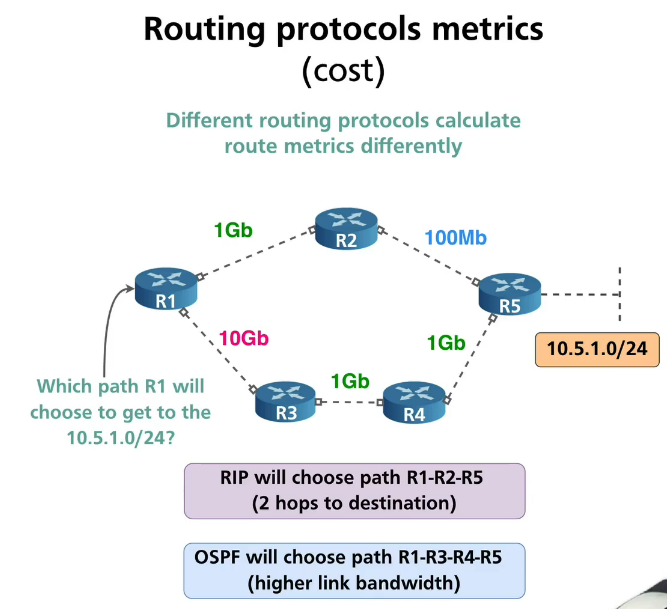

## Equal Cost Load Balancing (Lecture 153 of Bogdan)

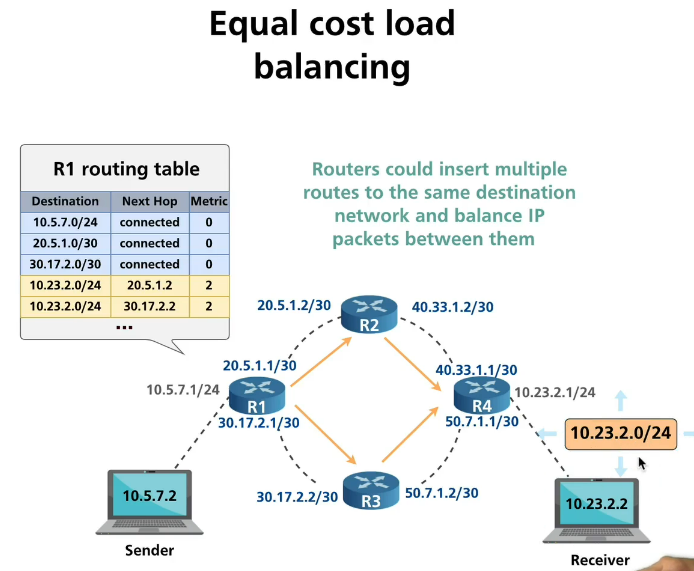

In the above example, we assume that routers use RIP which uses hop count as the metric.

## Routing via Multiple Routers (Lecture 154 of Bogdan)

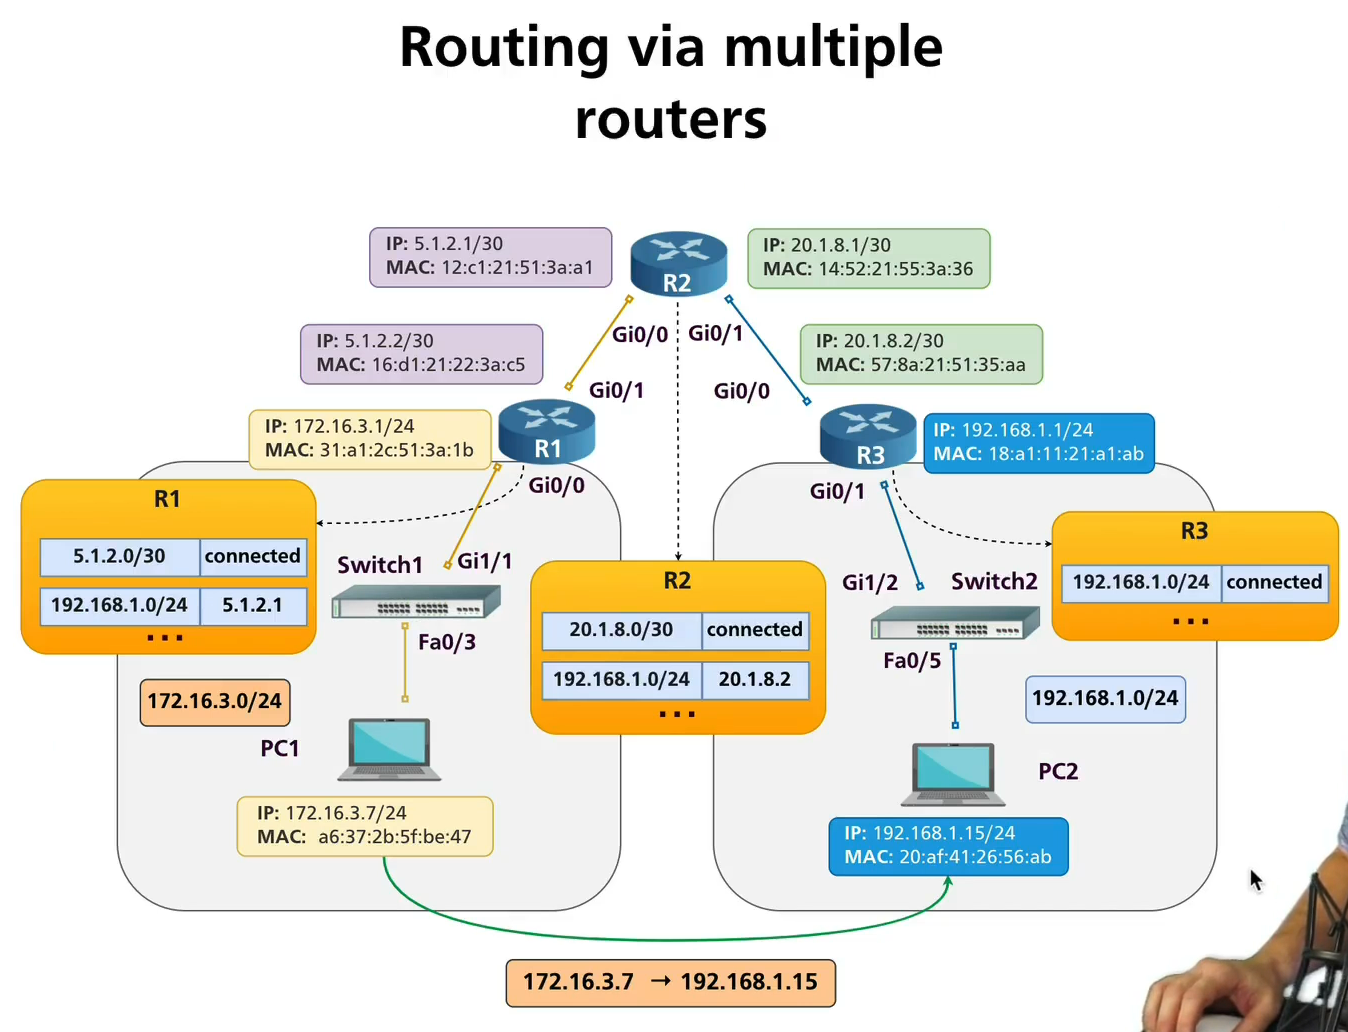

## Using TraceRoute utility for tracing path to remote servers (Lecture 155 of Bogdan)